# 1.Data & Sentiment Analysis Overview

We analysis on data to find out the relations with our reviews sentiment analysis research.
And then We apply sentiment analysis and find out the difference between them.

### Step 1. Analysis text relation with time
1. Time period
2. Reviwes Number by Month.
### Step 2. Sentiment Analysis - VADER

VADER is sensitive to both case and punctuation, including emojis, which can convey meaningful sentiment information.
Text Processing: We do nothing to text, as VADER is sensitive to both case and punctuation, including emojis. Expect translation to English that We already did in previous Cleaning steps.

### Step 3. 


In [17]:
#!pip install vaderSentiment
#!pip install dtaidistance 
#!pip install stargazer

In [105]:
import os

import pandas as pd
import numpy as np
from dtaidistance import dtw

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.display import HTML

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 2. Data Analysis

### Step 1. Analysis text relation with time

### Step 2.

### Step 3. 

In [12]:
save_imputed_year_month_remove_youngest_date_of_first_day_byCities_and_imputed_IsCommented_file_path = 'C:/Users/surface/DSDM/Semesters/semester2/text mining/Final Project/cleaned_data/Step_2nd_cleaning_imputed_year_month_remove_youngest_date_of_first_day_byCities_and_imputed_IsCommented.csv'

df = pd.read_csv(save_imputed_year_month_remove_youngest_date_of_first_day_byCities_and_imputed_IsCommented_file_path)
df.tail()

,Reviewer_Name,Review_Body,Review_Date,Rating,Country,Helpful_Tag,Travel Category,Require_Translate,City,Attraction_Rank,Year,Month,Is_Commented,Date
13730,Anonymous,There are no comments available for this review,2024-03-15,4,NaN,NaN,NaN,False,Venice,top1,2024,March,False,2024-03-01
13731,claude,Take a citizen pass and a vaporetto subscripti...,2024-03-15,5,France,Helpful,solo,True,Venice,top2,2024,March,True,2024-03-01
13732,Birgit,A highlight of our holiday week in Venice. Gre...,2024-03-15,5,Germany,Helpful,a partner or spouse,True,Venice,top2,2024,March,True,2024-03-01
13733,Sharon,There are no comments available for this review,2024-03-15,4,Ireland,NaN,friends,False,Venice,top2,2024,March,False,2024-03-01
13734,Anonymous,There are no comments available for this review,2024-03-16,1,NaN,NaN,NaN,False,Venice,top2,2024,March,False,2024-03-01


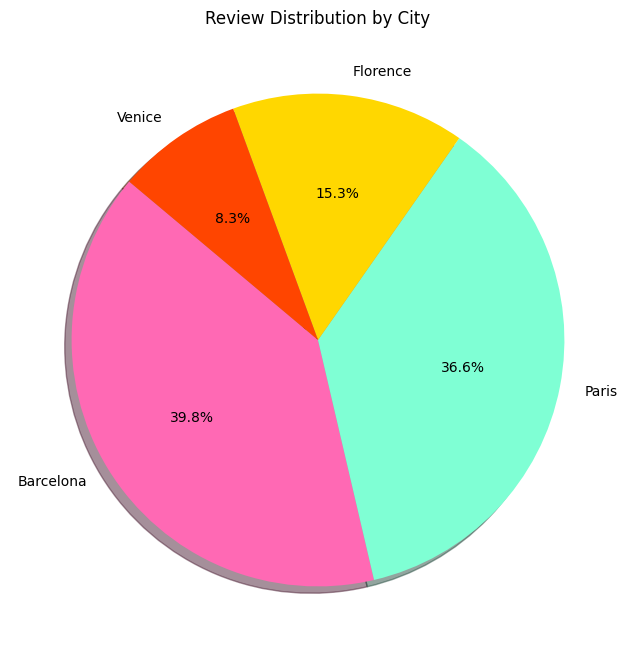

City
Barcelona    5417
Paris        4990
Florence     2086
Venice       1130
Name: count, dtype: int64


In [38]:
df = df[df['City'] != 'Ljubljana']
city_counts = df['City'].value_counts()
fancy_colors = ['#FF69B4', '#7FFFD4', '#FFD700', '#FF4500']

# Define a set of fancy colors for the pie chart
fancy_colors = ['#FF69B4', '#7FFFD4', '#FFD700', '#FF4500']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, colors=fancy_colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Review Distribution by City')
plt.show()

print(city_counts)

### Step 1. Analysis text relation with time

In [6]:
# Group by 'City' and sort each group by 'Review_Date'
sorted_groups = df.groupby('City').apply(lambda x: x.sort_values('Review_Date')).reset_index(drop=True)

# Now, since 'City' is only a column, this should work without causing an error
time_periods = sorted_groups.groupby('City')['Review_Date'].agg([min, max])

# Reset index to make 'City' a column again (optional, in this case, 'City' is already a column)
time_periods.reset_index(inplace=True)

# Display the time periods for each city
print(time_periods)


        City         min         max
0  Barcelona  2021-08-01  2024-03-17
1   Florence  2021-07-31  2024-03-15
2  Ljubljana  2022-07-17  2024-03-12
3      Paris  2021-07-28  2024-03-17
4     Venice  2021-08-10  2024-03-16


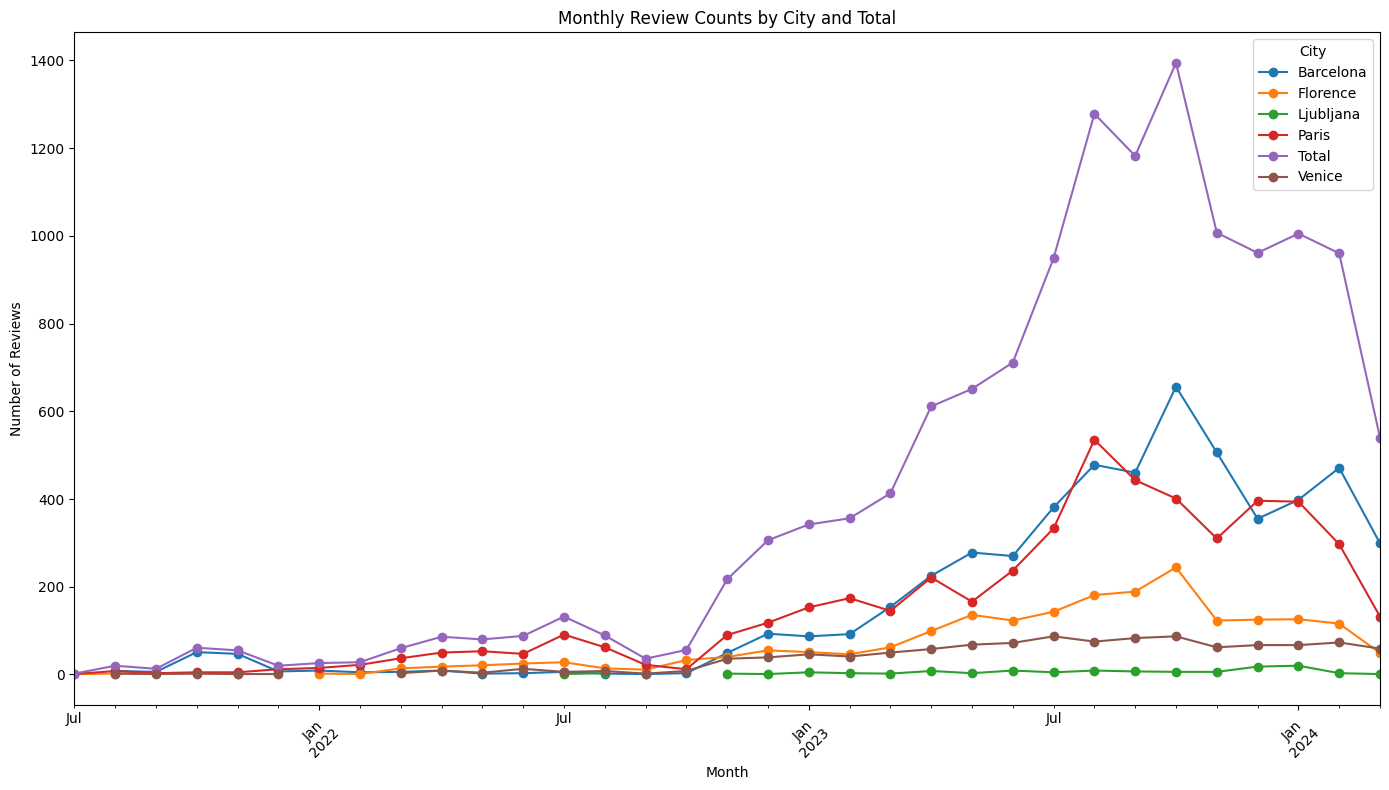

In [15]:
df_new = df.copy()

# Ensure the Review_Date column is in datetime format
df_new['Review_Date'] = pd.to_datetime(df_new['Review_Date'])

# Create a 'YearMonth' column for grouping
df_new['YearMonth'] = df_new['Review_Date'].dt.to_period('M')

# Aggregate data: Count number of reviews per month for each city
monthly_reviews_per_city = df_new.groupby(['City', 'YearMonth']).size().reset_index(name='ReviewCount')

# Aggregate data: Count total number of reviews per month across all cities
total_monthly_reviews = df_new.groupby('YearMonth').size().reset_index(name='ReviewCount')
total_monthly_reviews['City'] = 'Total'

# Combine both DataFrames
combined_reviews = pd.concat([monthly_reviews_per_city, total_monthly_reviews])

# Pivot the data for plotting
pivot_reviews = combined_reviews.pivot(index='YearMonth', columns='City', values='ReviewCount')

# Plotting
pivot_reviews.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Monthly Review Counts by City and Total')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Sentiment Analysis - VADER
#### VADER is sensitive to both case and punctuation, including emojis, which can convey meaningful sentiment information.
##### We use VADER tool to analyze sentiment score, in Negative, Positive and Neural.

In [22]:
df_new = df.copy()

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def calculate_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Wrap the .apply function with tqdm for a loading bar
tqdm.pandas(desc="Analyzing Sentiment")

# Apply sentiment analysis only to rows where 'Is_Commented' is True
df_new['Sentiment_Score'] = np.where(df_new['Is_Commented'], df_new['Review_Body'].progress_apply(calculate_sentiment), np.NaN)

# Display the updated DataFrame
display(df_new.tail())

,Reviewer_Name,Review_Body,Review_Date,Rating,Country,Helpful_Tag,Travel Category,Require_Translate,City,Attraction_Rank,Year,Month,Is_Commented,Date,Sentiment_Score
13730,Anonymous,There are no comments available for this review,2024-03-15,4,NaN,NaN,NaN,False,Venice,top1,2024,March,False,2024-03-01,NaN
13731,claude,Take a citizen pass and a vaporetto subscripti...,2024-03-15,5,France,Helpful,solo,True,Venice,top2,2024,March,True,2024-03-01,0.4939
13732,Birgit,A highlight of our holiday week in Venice. Gre...,2024-03-15,5,Germany,Helpful,a partner or spouse,True,Venice,top2,2024,March,True,2024-03-01,0.9483
13733,Sharon,There are no comments available for this review,2024-03-15,4,Ireland,NaN,friends,False,Venice,top2,2024,March,False,2024-03-01,NaN
13734,Anonymous,There are no comments available for this review,2024-03-16,1,NaN,NaN,NaN,False,Venice,top2,2024,March,False,2024-03-01,NaN


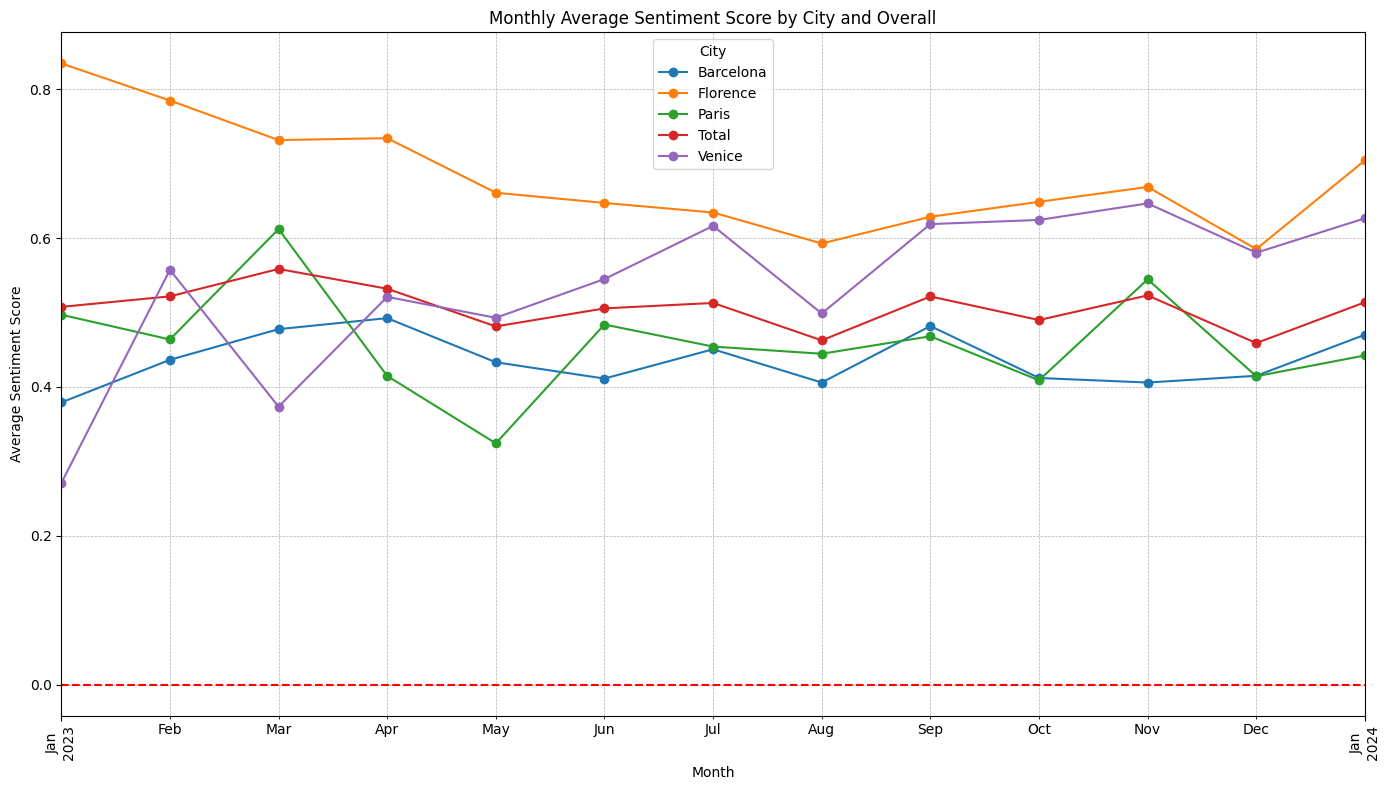

In [46]:
#df_new= df_new[df_new['City'] != 'Ljubljana']

# Ensure 'Review_Date' is in datetime format
df_new['Review_Date'] = pd.to_datetime(df_new['Review_Date'])

# Define the date range for selection
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-01-31')

# Select rows between start date and end date based on 'Review_Date'
df_new = df_new[(df_new['Review_Date'] >= start_date) & (df_new['Review_Date'] <= end_date)]

# After filtering by date, now create 'YearMonth' for grouping
df_new['YearMonth'] = df_new['Review_Date'].dt.strftime('%Y-%m')
# Group by City and YearMonth, calculate the mean Sentiment_Score
city_monthly_avg = df_new.groupby(['City', 'YearMonth'])['Sentiment_Score'].mean().reset_index()

# Also calculate the overall monthly average across all cities
overall_monthly_avg = df_new.groupby('YearMonth')['Sentiment_Score'].mean().reset_index()
overall_monthly_avg['City'] = 'Total'

# Concatenate both DataFrames
concatenated = pd.concat([city_monthly_avg, overall_monthly_avg])

# Pivot for plotting
pivot_df = concatenated.pivot(index='YearMonth', columns='City', values='Sentiment_Score')

# Convert index to a PeriodIndex to ensure proper sorting and alignment on the plot
pivot_df.index = pd.PeriodIndex(pivot_df.index, freq='M')

# Sort the index
pivot_df = pivot_df.sort_index()

# Plot
pivot_df.plot(figsize=(14, 8), marker='o')
plt.title('Monthly Average Sentiment Score by City and Overall')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

We pick March to Jun, difference we set is May. June to September, difference we set is Augus. From September to January, difference we set is December.
We then have 2 destination, Barcelona and Florence. Barcelona as treatment, Florence as control

In [48]:
df_new[[ 'City','Attraction_Rank']]

,City,Attraction_Rank
307,Barcelona,top1
308,Barcelona,top1
309,Barcelona,top1
310,Barcelona,top1
311,Barcelona,top1
...,...,...
13598,Venice,top1
13599,Venice,top1
13600,Venice,top1
13601,Venice,top2


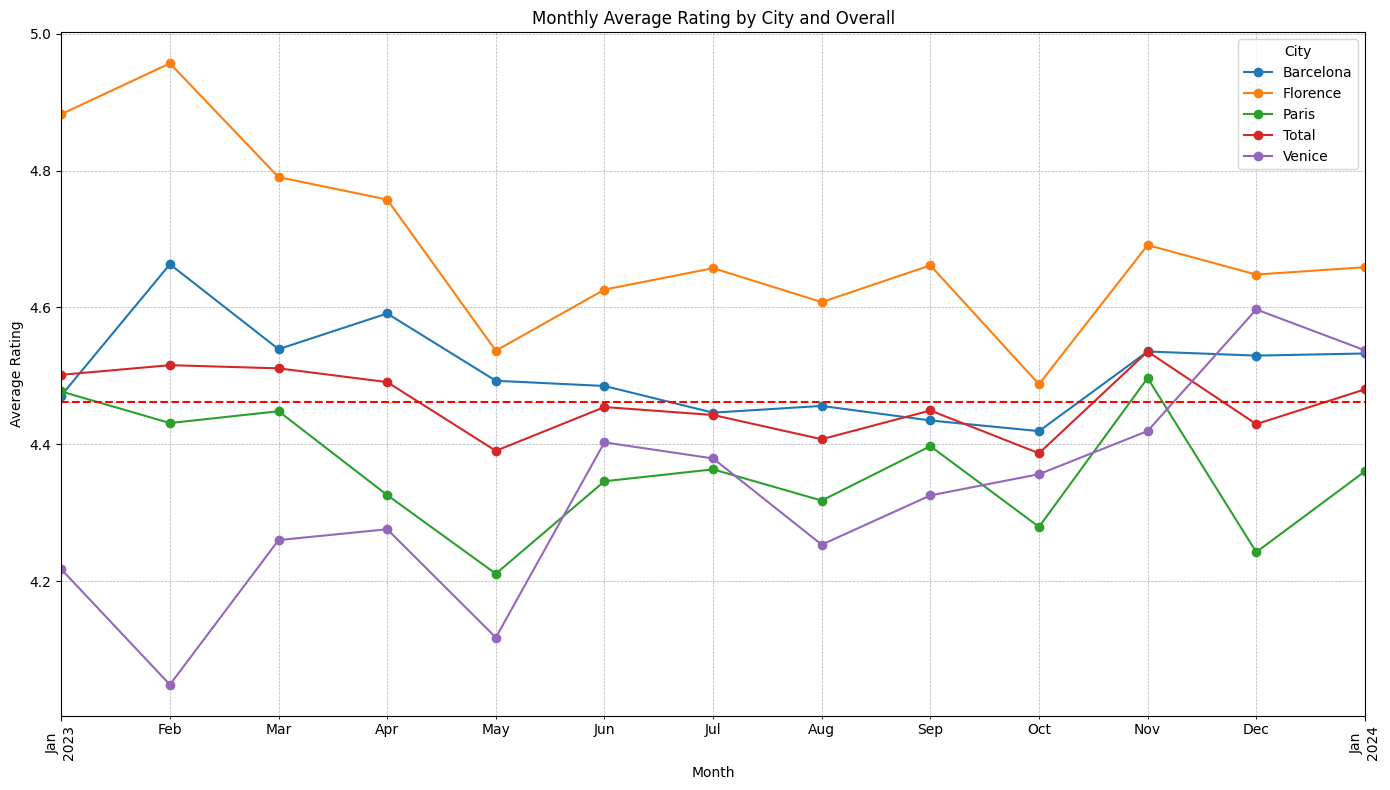

In [47]:
city_monthly_avg_rating = df_new.groupby(['City', 'YearMonth'])['Rating'].mean().reset_index()

# Also calculate the overall monthly average rating across all cities
overall_monthly_avg_rating = df_new.groupby('YearMonth')['Rating'].mean().reset_index()
overall_monthly_avg_rating['City'] = 'Total'

# Concatenate both DataFrames
concatenated_ratings = pd.concat([city_monthly_avg_rating, overall_monthly_avg_rating])

# Pivot for plotting
pivot_df_ratings = concatenated_ratings.pivot(index='YearMonth', columns='City', values='Rating')

# Convert index to a PeriodIndex to ensure proper sorting and alignment on the plot
pivot_df_ratings.index = pd.PeriodIndex(pivot_df_ratings.index, freq='M')

# Sort the index
pivot_df_ratings = pivot_df_ratings.sort_index()

# Plot
pivot_df_ratings.plot(figsize=(14, 8), marker='o')
plt.title('Monthly Average Rating by City and Overall')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.axhline(y=pivot_df_ratings['Total'].mean(), color='r', linestyle='--')  # Add a horizontal line at the overall average rating for reference
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

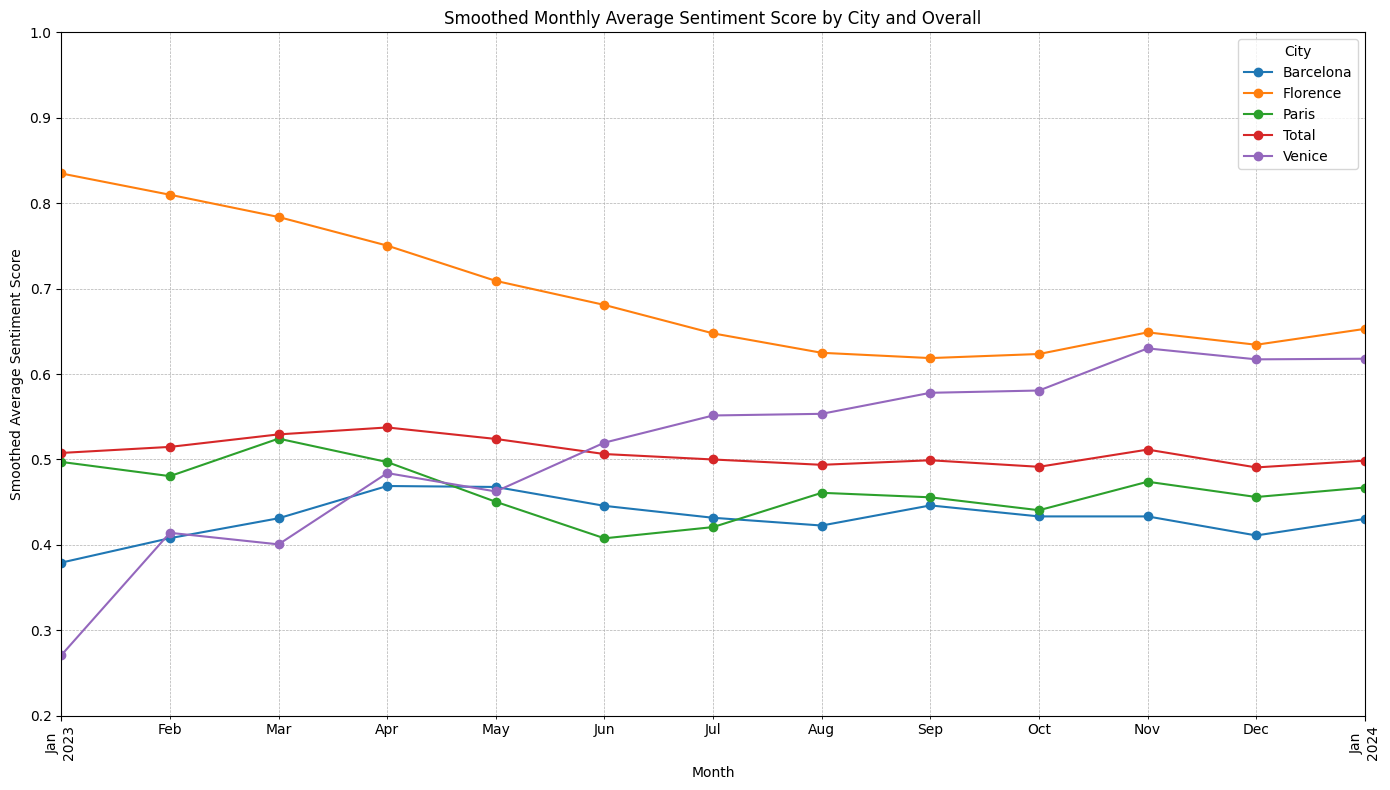

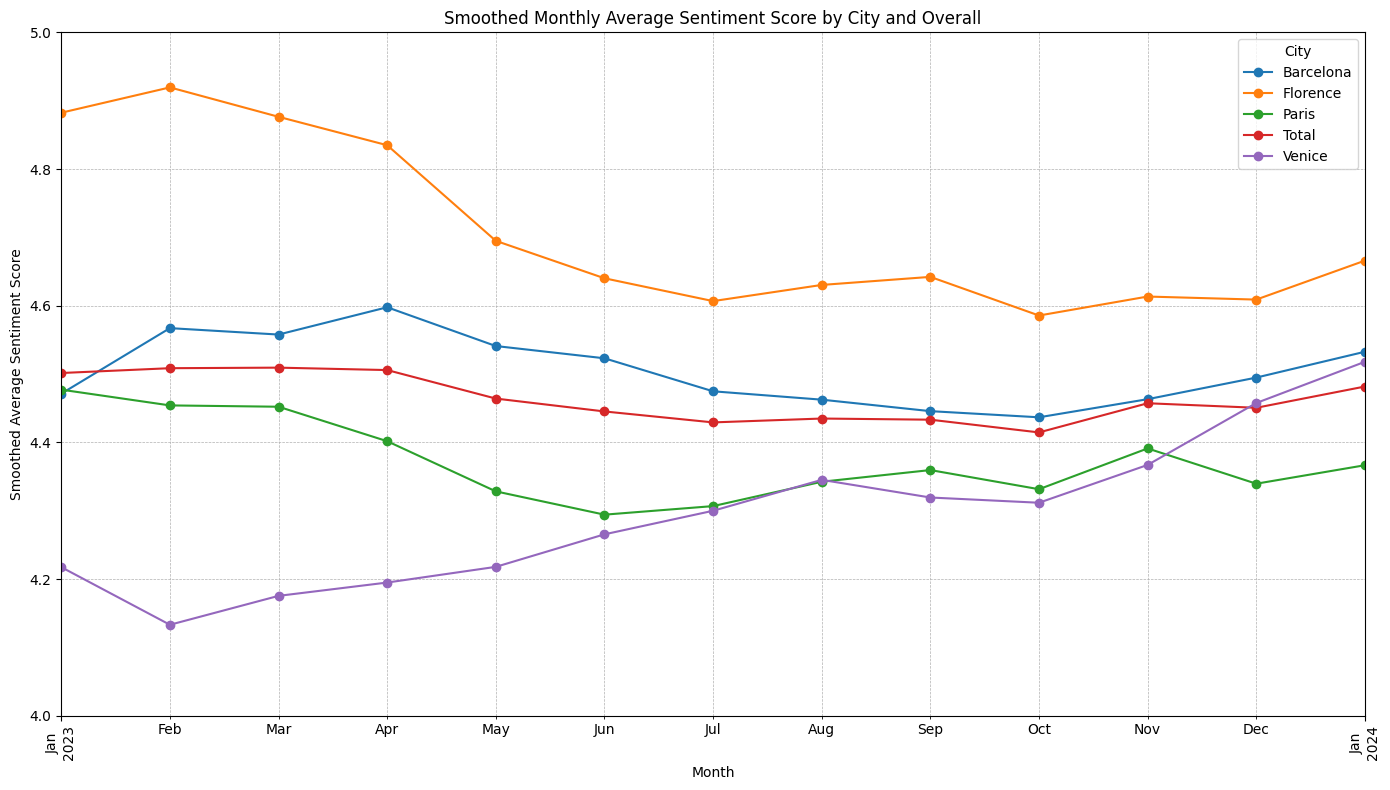

In [58]:
def rolling_smoothing(pivot_df, window_size = 3, y_axis_limit=None):
    pivot_df_smoothed = pivot_df.rolling(window=window_size, min_periods=1).mean()

    # Plotting the smoothed data
    pivot_df_smoothed.plot(figsize=(14, 8), marker='o')
    plt.title('Smoothed Monthly Average Sentiment Score by City and Overall')
    plt.xlabel('Month')
    plt.ylabel('Smoothed Average Sentiment Score')
    plt.xticks(rotation=90)
    plt.axhline(y=0, color='grey', linestyle='--')  # Adding a horizontal line at sentiment score 0
    
    # Set the y-axis limits if specified
    if y_axis_limit is not None:
        plt.ylim(y_axis_limit)
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Usage example with y-axis limit set
# For sentiment scores
rolling_smoothing(pivot_df, window_size = 3, y_axis_limit=(0.2, 1))

# For ratings (assuming pivot_df_ratings is defined and contains rating data)
# Adjust y_axis_limit according to the range of ratings
rolling_smoothing(pivot_df_ratings, window_size = 3, y_axis_limit=(4.0, 5))

## Series Similarity

In [ ]:
pivot_reviews # reviews number sereis
pivot_df # sentiment score series
pivot_df_ratings # rating series

In [91]:
# Import necessary library
from dtaidistance import dtw
import pandas as pd

# Function to compute DTW distance
def compute_dtw_distance(city_data1, city_data2):
    distance_score = dtw.distance(city_data1, city_data2)
    return distance_score

# Function to compute DTW distances for each city
def compute_dtw_distances(pivot_df, pivot_df_ratings):
    dtw_distances = {}
    cities = pivot_df.columns
    for city in cities:
        sentiment_series = pivot_df[city].dropna().to_numpy()
        rating_series = pivot_df_ratings[city].dropna().to_numpy()
        distance_score = compute_dtw_distance(sentiment_series, rating_series)
        dtw_distances[city] = distance_score
    return dtw_distances

# Example usage:
dtw_distances = compute_dtw_distances(pivot_df, pivot_df_ratings)

# Print DTW distances for each city
for city, distance_score in dtw_distances.items():
    print(f"DTW Distance between Sentiment Score and Rating for {city}: {distance_score}")


DTW Distance between Sentiment Score and Rating for Barcelona: 14.68041039556838
DTW Distance between Sentiment Score and Rating for Florence: 14.45400015612775
DTW Distance between Sentiment Score and Rating for Paris: 14.068937145333559
DTW Distance between Sentiment Score and Rating for Total: 14.257776963672889
DTW Distance between Sentiment Score and Rating for Venice: 13.658998083390697


# Diff-in-Diff

We pick March to Jun, difference we set is May. June to September, difference we set is Augus. From September to January, difference we set is December.
We then have 2 destination, Barcelona and Florence. Barcelona as treatment, Florence as control

Define Treatment and Control Groups: Barcelona is treatment group, and Florence is control group.

Define Pre- and Post-Treatment Periods: We want to compare the periods March to June, June to September, and September to January. And We consider May, August, and December as the months immediately before the treatment effect.

Compute the DiD Estimator: Compute the average change in the outcome variable (Sentiment Score) for the treatment and control groups before and after the treatment. The DiD estimator is the difference between these changes.

In [99]:
pivot_df

City,Barcelona,Florence,Paris,Total,Venice
YearMonth,,,,,
2023-01,0.379219,0.834807,0.497107,0.507620,0.270819
2023-02,0.436487,0.784940,0.463820,0.521770,0.557427
2023-03,0.477705,0.731761,0.612187,0.558595,0.373562
2023-04,0.492516,0.734320,0.414851,0.532021,0.521100
2023-05,0.433205,0.661009,0.324257,0.481361,0.492957
2023-06,0.411303,0.647294,0.483931,0.505612,0.545026
2023-07,0.450665,0.634445,0.454295,0.512904,0.616467
2023-08,0.405970,0.592817,0.444625,0.462626,0.498746
2023-09,0.481902,0.628725,0.468101,0.521619,0.618877


In [134]:

pivot_df.set_index('YearMonth', inplace=True)

# 1. Create dummy variables for treatment and post-treatment periods
pivot_df['Treatment'] = pivot_df['Treatment'].astype(int)
pivot_df['Post_Treatment'] = pivot_df['Post_Treatment'].astype(int)

# 2. Extracting data for the regression
X = sm.add_constant(pivot_df[['Treatment', 'Post_Treatment']])
y_barcelona = pivot_df['Barcelona']
y_florence = pivot_df['Florence']

# 3. Fit the DiD Model for Barcelona
model_barcelona = sm.OLS(y_barcelona, X).fit()

# 4. Print Summary of Results for Barcelona
print("DiD Estimator for Barcelona:")
print(model_barcelona.summary())

# 3. Fit the DiD Model for Florence
model_florence = sm.OLS(y_florence, X).fit()

# 4. Print Summary of Results for Florence
print("\nDiD Estimator for Florence:")
print(model_florence.summary())

KeyError: "None of ['YearMonth'] are in the columns"